<a href="https://colab.research.google.com/github/ilinashah177/Coursework-Website/blob/main/Sentiment_Analysis_and_Mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install spacy
!pip install scattertext
!pip install tika
!pip install spacytextblob
!python -m spacy download en_core_web_sm

In [2]:
import spacy
import json
import pylab
from IPython.core.display import display, HTML
import nltk
from tika import parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10., 8.)
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

In [19]:
# define the URL where your PDF lives. You could also upload your own pdf.
url='https://ojs.pssr.org.pk/journal/article/view/394'
# parse the pdf by feeding tika the URL and store the text in an object called "raw"
raw = parser.from_file(url)

2025-01-22 19:36:52,424 [MainThread  ] [INFO ]  Retrieving https://ojs.pssr.org.pk/journal/article/view/394 to /tmp/journal-article-view-394.
INFO:tika.tika:Retrieving https://ojs.pssr.org.pk/journal/article/view/394 to /tmp/journal-article-view-394.


In [20]:
raw['metadata']

{'citation_keywords': ['CPEC',
  'Climate Change',
  'Natural Environment',
  'Environmental Sustainability'],
 'keywords': 'Social sciences, research journal, Pakistan, multidisciplinary, academic research, peer-reviewed, scholarly articles, theoretical issues, applied research, social science disciplines, open access, academic publication, research publication, knowledge sharing',
 'citation_journal_title': 'Pakistan Social Sciences Review',
 'X-TIKA:Parsed-By-Full-Set': ['org.apache.tika.parser.DefaultParser',
  'org.apache.tika.parser.html.HtmlParser'],
 'X-TIKA:content_handler': 'ToTextContentHandler',
 'DC.Creator.PersonalName': ['Tayyaba Zainab Ali', 'Muhammad Usman Askari'],
 'DC.Source.URI': 'https://ojs.pssr.org.pk/journal',
 'citation_issn': '2664-0430',
 'DC.Date.dateSubmitted': '2023-12-04',
 'DC.Date.created': '2023-12-04',
 'dc:title': 'Impacts of the China-Pakistan Economic Corridor on the Natural Environment of Pakistan\n\t\t\t\t\t\t\t| Pakistan Social Sciences Review'

In [21]:
import pandas as pd

def analyze_text_with_origin():
    # Existing code (provided in the prompt)
    import spacy
    import json
    import pylab
    from IPython.core.display import display, HTML
    import nltk
    from tika import parser
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from spacytextblob.spacytextblob import SpacyTextBlob
    # ... (rest of the imports and setup)

    # Create an empty list to store the data
    data = []

    while True:
        country_origin = input("Enter the country of origin for the website/article (or type 'done' to finish): ")
        if country_origin.lower() == 'done':
            break

        url = input("Enter the URL of the PDF: ")

        try:
            # parse the pdf by feeding tika the URL
            raw = parser.from_file(url)
            text = raw['content']

            # Process text with spaCy
            doc = nlp(text)

            # Extract sentiment, polarity, and subjectivity
            sentiment = doc._.blob.polarity
            polarity = doc._.blob.polarity
            subjectivity = doc._.blob.subjectivity

            data.append([country_origin, url, sentiment, polarity, subjectivity])

        except Exception as e:
            print(f"An error occurred: {e}")
            print("Please check the URL and try again.")

    # Create a pandas DataFrame
    df = pd.DataFrame(data, columns=['Country of Origin', 'URL', 'Sentiment', 'Polarity', 'Subjectivity'])
    return df

# Example usage
df_results = analyze_text_with_origin()
df_results

Enter the country of origin for the website/article (or type 'done' to finish): Pakistan
Enter the URL of the PDF: https://ojs.pssr.org.pk/journal/article/view/394


2025-01-22 19:37:40,324 [MainThread  ] [INFO ]  Retrieving https://ojs.pssr.org.pk/journal/article/view/394 to /tmp/journal-article-view-394.
INFO:tika.tika:Retrieving https://ojs.pssr.org.pk/journal/article/view/394 to /tmp/journal-article-view-394.


Enter the country of origin for the website/article (or type 'done' to finish): https://www.energypolicy.columbia.edu/publications/china-pakistan-economic-corridor-power-projects-insights-environmental-and-debt-sustainability/
Enter the URL of the PDF: U.S.
An error occurred: [Errno 2] No such file or directory: '/content/U.S.'
Please check the URL and try again.
Enter the country of origin for the website/article (or type 'done' to finish): https://www.energypolicy.columbia.edu/publications/china-pakistan-economic-corridor-power-projects-insights-environmental-and-debt-sustainability/
Enter the URL of the PDF: u
An error occurred: [Errno 2] No such file or directory: '/content/u'
Please check the URL and try again.
Enter the country of origin for the website/article (or type 'done' to finish): U.S.
Enter the URL of the PDF: https://www.energypolicy.columbia.edu/publications/china-pakistan-economic-corridor-power-projects-insights-environmental-and-debt-sustainability/


2025-01-22 19:39:05,356 [MainThread  ] [INFO ]  Retrieving https://www.energypolicy.columbia.edu/publications/china-pakistan-economic-corridor-power-projects-insights-environmental-and-debt-sustainability/ to /tmp/publications-china-pakistan-economic-corridor-power-projects-insights-environmental-and-debt-sustainability.
INFO:tika.tika:Retrieving https://www.energypolicy.columbia.edu/publications/china-pakistan-economic-corridor-power-projects-insights-environmental-and-debt-sustainability/ to /tmp/publications-china-pakistan-economic-corridor-power-projects-insights-environmental-and-debt-sustainability.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter the country of origin for the website/article (or type 'done' to finish): China
Enter the URL of the PDF: https://eng.yidaiyilu.gov.cn/p/061HIDOA.html


2025-01-22 19:40:31,117 [MainThread  ] [INFO ]  Retrieving https://eng.yidaiyilu.gov.cn/p/061HIDOA.html to /tmp/p-061hidoa.html.
INFO:tika.tika:Retrieving https://eng.yidaiyilu.gov.cn/p/061HIDOA.html to /tmp/p-061hidoa.html.


Enter the country of origin for the website/article (or type 'done' to finish): Pakistan
Enter the URL of the PDF: https://www.mdpi.com/2673-4591/75/1/31


2025-01-22 19:41:12,630 [MainThread  ] [INFO ]  Retrieving https://www.mdpi.com/2673-4591/75/1/31 to /tmp/2673-4591-75-1-31.
INFO:tika.tika:Retrieving https://www.mdpi.com/2673-4591/75/1/31 to /tmp/2673-4591-75-1-31.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter the country of origin for the website/article (or type 'done' to finish): London
Enter the URL of the PDF: ld
An error occurred: [Errno 2] No such file or directory: '/content/ld'
Please check the URL and try again.
Enter the country of origin for the website/article (or type 'done' to finish): England
Enter the URL of the PDF: https://dialogue.earth/en/business/11750-why-don-t-cpec-projects-factor-in-the-climate-crisis/


2025-01-22 19:42:51,216 [MainThread  ] [INFO ]  Retrieving https://dialogue.earth/en/business/11750-why-don-t-cpec-projects-factor-in-the-climate-crisis/ to /tmp/en-business-11750-why-don-t-cpec-projects-factor-in-the-climate-crisis.
INFO:tika.tika:Retrieving https://dialogue.earth/en/business/11750-why-don-t-cpec-projects-factor-in-the-climate-crisis/ to /tmp/en-business-11750-why-don-t-cpec-projects-factor-in-the-climate-crisis.


Enter the country of origin for the website/article (or type 'done' to finish): England
Enter the URL of the PDF: https://odi.org/en/publications/bri-energy-infrastructure-in-pakistan-environmental-and-climate-risks-and-opportunities/


2025-01-22 19:43:37,786 [MainThread  ] [INFO ]  Retrieving https://odi.org/en/publications/bri-energy-infrastructure-in-pakistan-environmental-and-climate-risks-and-opportunities/ to /tmp/en-publications-bri-energy-infrastructure-in-pakistan-environmental-and-climate-risks-and-opportunities.
INFO:tika.tika:Retrieving https://odi.org/en/publications/bri-energy-infrastructure-in-pakistan-environmental-and-climate-risks-and-opportunities/ to /tmp/en-publications-bri-energy-infrastructure-in-pakistan-environmental-and-climate-risks-and-opportunities.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter the country of origin for the website/article (or type 'done' to finish): China
Enter the URL of the PDF: https://english.news.cn/20220604/9654a165d44240dda75fc49798ea5550/c.html


2025-01-22 19:44:04,042 [MainThread  ] [INFO ]  Retrieving https://english.news.cn/20220604/9654a165d44240dda75fc49798ea5550/c.html to /tmp/20220604-9654a165d44240dda75fc49798ea5550-c.html.
INFO:tika.tika:Retrieving https://english.news.cn/20220604/9654a165d44240dda75fc49798ea5550/c.html to /tmp/20220604-9654a165d44240dda75fc49798ea5550-c.html.


Enter the country of origin for the website/article (or type 'done' to finish): Pakistan
Enter the URL of the PDF: https://ojs.jdss.org.pk/journal/article/view/820/757


2025-01-22 19:44:45,814 [MainThread  ] [INFO ]  Retrieving https://ojs.jdss.org.pk/journal/article/view/820/757 to /tmp/journal-article-view-820-757.
INFO:tika.tika:Retrieving https://ojs.jdss.org.pk/journal/article/view/820/757 to /tmp/journal-article-view-820-757.


Enter the country of origin for the website/article (or type 'done' to finish): done


,Country of Origin,URL,Sentiment,Polarity,Subjectivity
0,Pakistan,https://ojs.pssr.org.pk/journal/article/view/394,0.075270,0.075270,0.310760
1,China,https://eng.yidaiyilu.gov.cn/p/061HIDOA.html,0.026187,0.026187,0.182657
2,England,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542
3,China,https://english.news.cn/20220604/9654a165d4424...,0.096095,0.096095,0.411711
4,Pakistan,https://ojs.jdss.org.pk/journal/article/view/8...,0.200000,0.200000,0.200000


In [26]:
import spacy
import json
import pylab
from IPython.core.display import display, HTML
import nltk
from tika import parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

# Install packages, redirecting output to suppress it
!pip install spacy > /dev/null
!pip install scattertext > /dev/null
!pip install tika > /dev/null
!pip install spacytextblob > /dev/null
!python -m spacy download en_core_web_sm > /dev/null

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10., 8.)
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

def analyze_text_with_origin():
    # Create an empty DataFrame
    df = pd.DataFrame(columns=['Country of Origin', 'URL', 'Sentiment', 'Polarity', 'Subjectivity', 'Overall Sentiment'])

    while True:
        action = input("Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: ")

        if action.lower() == 'done':
            break
        elif action.lower() == 'add':
            country_origin = input("Enter the country of origin for the website/article: ")
            url = input("Enter the URL of the PDF: ")

            try:
                raw = parser.from_file(url)
                text = raw['content']
                doc = nlp(text)

                sentiment = doc._.blob.polarity
                polarity = doc._.blob.polarity
                subjectivity = doc._.blob.subjectivity

                # Classify overall sentiment
                overall_sentiment = "Positive" if sentiment > 0.1 else ("Negative" if sentiment < -0.1 else "Neutral")

                new_row = pd.DataFrame({
                    'Country of Origin': [country_origin],
                    'URL': [url],
                    'Sentiment': [sentiment],
                    'Polarity': [polarity],
                    'Subjectivity': [subjectivity],
                    'Overall Sentiment': [overall_sentiment]
                })
                df = pd.concat([df, new_row], ignore_index=True)
                print("Row added successfully.")

            except Exception as e:
                print(f"An error occurred: {e}")
                print("Please check the URL and try again.")

        elif action.lower() == 'delete':
            if df.empty:
                print("The DataFrame is empty. Nothing to delete.")
                continue
            print(df)  # Show the DataFrame to the user
            try:
                index_to_delete = int(input("Enter the index of the row to delete: "))
                if 0 <= index_to_delete < len(df):
                    df = df.drop(index_to_delete)
                    df = df.reset_index(drop=True) #reset index after deleting
                    print("Row deleted successfully.")
                else:
                    print("Invalid index.")
            except ValueError:
                print("Invalid input. Please enter a valid index.")

        else:
            print("Invalid action. Please enter 'add', 'delete', or 'done'.")

    return df

df_results = analyze_text_with_origin()
df_results

Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United States
Enter the URL of the PDF: https://people.climate.columbia.edu/projects/view/232


2025-01-22 20:11:40,321 [MainThread  ] [INFO ]  Retrieving https://people.climate.columbia.edu/projects/view/232 to /tmp/projects-view-232.
INFO:tika.tika:Retrieving https://people.climate.columbia.edu/projects/view/232 to /tmp/projects-view-232.
<ipython-input-26-fa54c0a39498>:57: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Row added successfully.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: done


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.037655,0.037655,0.354832,Neutral


In [27]:
# prompt: can you edit the above function so that you can click done and see the data frame and then add to the same data frame afterwards

import spacy
import json
import pylab
from IPython.core.display import display, HTML
import nltk
from tika import parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

# Install packages, redirecting output to suppress it
!pip install spacy > /dev/null
!pip install scattertext > /dev/null
!pip install tika > /dev/null
!pip install spacytextblob > /dev/null
!python -m spacy download en_core_web_sm > /dev/null

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10., 8.)
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

def analyze_text_with_origin():
    # Create an empty DataFrame
    df = pd.DataFrame(columns=['Country of Origin', 'URL', 'Sentiment', 'Polarity', 'Subjectivity', 'Overall Sentiment'])

    while True:
        action = input("Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: ")

        if action.lower() == 'done':
            break
        elif action.lower() == 'add':
            country_origin = input("Enter the country of origin for the website/article: ")
            url = input("Enter the URL of the PDF: ")

            try:
                raw = parser.from_file(url)
                text = raw['content']
                doc = nlp(text)

                sentiment = doc._.blob.polarity
                polarity = doc._.blob.polarity
                subjectivity = doc._.blob.subjectivity

                # Classify overall sentiment
                overall_sentiment = "Positive" if sentiment > 0.1 else ("Negative" if sentiment < -0.1 else "Neutral")

                new_row = pd.DataFrame({
                    'Country of Origin': [country_origin],
                    'URL': [url],
                    'Sentiment': [sentiment],
                    'Polarity': [polarity],
                    'Subjectivity': [subjectivity],
                    'Overall Sentiment': [overall_sentiment]
                })
                df = pd.concat([df, new_row], ignore_index=True)
                print("Row added successfully.")
                display(df) #display the df after each addition

            except Exception as e:
                print(f"An error occurred: {e}")
                print("Please check the URL and try again.")

        elif action.lower() == 'delete':
            if df.empty:
                print("The DataFrame is empty. Nothing to delete.")
                continue
            print(df)  # Show the DataFrame to the user
            try:
                index_to_delete = int(input("Enter the index of the row to delete: "))
                if 0 <= index_to_delete < len(df):
                    df = df.drop(index_to_delete)
                    df = df.reset_index(drop=True) #reset index after deleting
                    print("Row deleted successfully.")
                    display(df) #display the df after each deletion
                else:
                    print("Invalid index.")
            except ValueError:
                print("Invalid input. Please enter a valid index.")

        else:
            print("Invalid action. Please enter 'add', 'delete', or 'done'.")

    return df

df_results = analyze_text_with_origin()
df_results

Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United States
Enter the URL of the PDF: https://people.climate.columbia.edu/projects/view/232


2025-01-22 20:13:48,358 [MainThread  ] [INFO ]  Retrieving https://people.climate.columbia.edu/projects/view/232 to /tmp/projects-view-232.
INFO:tika.tika:Retrieving https://people.climate.columbia.edu/projects/view/232 to /tmp/projects-view-232.


Row added successfully.


<ipython-input-27-0102d98273d1>:59: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United States
Enter the URL of the PDF: https://thediplomat.com/2018/04/cpecs-environmental-toll/


2025-01-22 20:15:04,854 [MainThread  ] [INFO ]  Retrieving https://thediplomat.com/2018/04/cpecs-environmental-toll/ to /tmp/2018-04-cpecs-environmental-toll.
INFO:tika.tika:Retrieving https://thediplomat.com/2018/04/cpecs-environmental-toll/ to /tmp/2018-04-cpecs-environmental-toll.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://cscr.pk/explore/themes/energy-environment/cpec-promoting-green-and-sustainable-development/


2025-01-22 20:16:07,493 [MainThread  ] [INFO ]  Retrieving https://cscr.pk/explore/themes/energy-environment/cpec-promoting-green-and-sustainable-development/ to /tmp/explore-themes-energy-environment-cpec-promoting-green-and-sustainable-development.
INFO:tika.tika:Retrieving https://cscr.pk/explore/themes/energy-environment/cpec-promoting-green-and-sustainable-development/ to /tmp/explore-themes-energy-environment-cpec-promoting-green-and-sustainable-development.


An error occurred: <urlopen error [Errno 104] Connection reset by peer>
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://ojs.pssr.org.pk/journal/article/view/394/253


2025-01-22 20:16:54,908 [MainThread  ] [INFO ]  Retrieving https://ojs.pssr.org.pk/journal/article/view/394/253 to /tmp/journal-article-view-394-253.
INFO:tika.tika:Retrieving https://ojs.pssr.org.pk/journal/article/view/394/253 to /tmp/journal-article-view-394-253.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://ojs.pssr.org.pk/journal/article/view/394/253


2025-01-22 20:18:23,395 [MainThread  ] [INFO ]  Retrieving https://ojs.pssr.org.pk/journal/article/view/394/253 to /tmp/journal-article-view-394-253.
INFO:tika.tika:Retrieving https://ojs.pssr.org.pk/journal/article/view/394/253 to /tmp/journal-article-view-394-253.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United Kingdom
Enter the URL of the PDF: https://iopscience.iop.org/article/10.1088/2515-7620/ad8a22


2025-01-22 20:20:27,313 [MainThread  ] [INFO ]  Retrieving https://iopscience.iop.org/article/10.1088/2515-7620/ad8a22 to /tmp/article-10.1088-2515-7620-ad8a22.
INFO:tika.tika:Retrieving https://iopscience.iop.org/article/10.1088/2515-7620/ad8a22 to /tmp/article-10.1088-2515-7620-ad8a22.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: China
Enter the URL of the PDF: https://greenfdc.org/green-finance-guideline-baseline-for-china-pakistan-economic-corridor-cpec/


2025-01-22 20:22:08,075 [MainThread  ] [INFO ]  Retrieving https://greenfdc.org/green-finance-guideline-baseline-for-china-pakistan-economic-corridor-cpec/ to /tmp/green-finance-guideline-baseline-for-china-pakistan-economic-corridor-cpec.
INFO:tika.tika:Retrieving https://greenfdc.org/green-finance-guideline-baseline-for-china-pakistan-economic-corridor-cpec/ to /tmp/green-finance-guideline-baseline-for-china-pakistan-economic-corridor-cpec.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: China
Enter the URL of the PDF: https://english.news.cn/asiapacific/20220603/73e8c26a50414c65a5cf9fcd258c22e2/c.html


2025-01-22 20:22:45,967 [MainThread  ] [INFO ]  Retrieving https://english.news.cn/asiapacific/20220603/73e8c26a50414c65a5cf9fcd258c22e2/c.html to /tmp/asiapacific-20220603-73e8c26a50414c65a5cf9fcd258c22e2-c.html.
INFO:tika.tika:Retrieving https://english.news.cn/asiapacific/20220603/73e8c26a50414c65a5cf9fcd258c22e2/c.html to /tmp/asiapacific-20220603-73e8c26a50414c65a5cf9fcd258c22e2-c.html.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United Kingdom
Enter the URL of the PDF: https://dialogue.earth/en/business/11750-why-don-t-cpec-projects-factor-in-the-climate-crisis/


2025-01-22 20:23:33,686 [MainThread  ] [INFO ]  Retrieving https://dialogue.earth/en/business/11750-why-don-t-cpec-projects-factor-in-the-climate-crisis/ to /tmp/en-business-11750-why-don-t-cpec-projects-factor-in-the-climate-crisis.
INFO:tika.tika:Retrieving https://dialogue.earth/en/business/11750-why-don-t-cpec-projects-factor-in-the-climate-crisis/ to /tmp/en-business-11750-why-don-t-cpec-projects-factor-in-the-climate-crisis.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://ccls.lums.edu.pk/sites/default/files/2023-01/the_critical_junction_between_cpec_agriculture_and_climate_change.pdf


2025-01-22 20:24:45,961 [MainThread  ] [INFO ]  Retrieving https://ccls.lums.edu.pk/sites/default/files/2023-01/the_critical_junction_between_cpec_agriculture_and_climate_change.pdf to /tmp/sites-default-files-2023-01-the_critical_junction_between_cpec_agriculture_and_climate_change.pdf.
INFO:tika.tika:Retrieving https://ccls.lums.edu.pk/sites/default/files/2023-01/the_critical_junction_between_cpec_agriculture_and_climate_change.pdf to /tmp/sites-default-files-2023-01-the_critical_junction_between_cpec_agriculture_and_climate_change.pdf.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United States
Enter the URL of the PDF: https://www.newsecuritybeat.org/2022/02/reducing-environmental-social-costs-chinese-investments-pakistan/


2025-01-22 20:25:54,452 [MainThread  ] [INFO ]  Retrieving https://www.newsecuritybeat.org/2022/02/reducing-environmental-social-costs-chinese-investments-pakistan/ to /tmp/2022-02-reducing-environmental-social-costs-chinese-investments-pakistan.
INFO:tika.tika:Retrieving https://www.newsecuritybeat.org/2022/02/reducing-environmental-social-costs-chinese-investments-pakistan/ to /tmp/2022-02-reducing-environmental-social-costs-chinese-investments-pakistan.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United Kingdom
Enter the URL of the PDF: https://dialogue.earth/en/business/comment-pakistan-must-enshrine-environmental-mandate-for-cpec/


2025-01-22 20:26:48,609 [MainThread  ] [INFO ]  Retrieving https://dialogue.earth/en/business/comment-pakistan-must-enshrine-environmental-mandate-for-cpec/ to /tmp/en-business-comment-pakistan-must-enshrine-environmental-mandate-for-cpec.
INFO:tika.tika:Retrieving https://dialogue.earth/en/business/comment-pakistan-must-enshrine-environmental-mandate-for-cpec/ to /tmp/en-business-comment-pakistan-must-enshrine-environmental-mandate-for-cpec.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: China
Enter the URL of the PDF: https://download.ssrn.com/21/09/21/ssrn_id3928027_code3239092.pdf?response-content-disposition=inline&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEOT%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCXVzLWVhc3QtMSJGMEQCIFj6lDhs%2B2ZBVVqbC9lYDE6dfDOczLBgERDPXxbizLXbAiAiqofHVte%2BPnNVacxd8KfDg0Oo7cUpYDTFUQDn0rDtyCrGBQjd%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F8BEAQaDDMwODQ3NTMwMTI1NyIMgKH0ui49EC%2BIaozeKpoF3tKhRab1U4rkxVvtbvhcLTzJSQo1hnpSyzWeO%2FbGWu92I56ISH5bBmr%2FxVUJKTjuOGRPbV3VvEarQHB7CiU1YgjgrCfIKqpORUTn9kNrKLF9lQ3vSKsmRScsIvbSkAcgdOk28Ql%2BBdg3RpvEyN4SxutKxtrA0s7HoGyIiklIjWfe0g6gj%2F5LUcPa4NkLwg%2FnuWSRlfDVY0RWrEXzQijVMjv84fO%2FkkqnNjECxHR4HjWn5zYvK9ITfVx%2BJq64teePy5tgjWWrBLR%2B%2BIyiFrdMeKPtxY0JWrQ0S4z%2F2HRHvKQDDP9KwNvGjoQxgd3QH%2F0TMhqSajwWBklO3Qi1bCPIz76EvMMoNhpeAuLY8uLGsSwK2LTnvaXOq4kfhi2351oNwiMdHB%2F6sNfp5Az1HbmN5FO2HezjLERmeepshgQEiGEPTItEzibuFQ%2F

2025-01-22 20:30:57,158 [MainThread  ] [INFO ]  Retrieving https://download.ssrn.com/21/09/21/ssrn_id3928027_code3239092.pdf?response-content-disposition=inline&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEOT%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCXVzLWVhc3QtMSJGMEQCIFj6lDhs%2B2ZBVVqbC9lYDE6dfDOczLBgERDPXxbizLXbAiAiqofHVte%2BPnNVacxd8KfDg0Oo7cUpYDTFUQDn0rDtyCrGBQjd%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F8BEAQaDDMwODQ3NTMwMTI1NyIMgKH0ui49EC%2BIaozeKpoF3tKhRab1U4rkxVvtbvhcLTzJSQo1hnpSyzWeO%2FbGWu92I56ISH5bBmr%2FxVUJKTjuOGRPbV3VvEarQHB7CiU1YgjgrCfIKqpORUTn9kNrKLF9lQ3vSKsmRScsIvbSkAcgdOk28Ql%2BBdg3RpvEyN4SxutKxtrA0s7HoGyIiklIjWfe0g6gj%2F5LUcPa4NkLwg%2FnuWSRlfDVY0RWrEXzQijVMjv84fO%2FkkqnNjECxHR4HjWn5zYvK9ITfVx%2BJq64teePy5tgjWWrBLR%2B%2BIyiFrdMeKPtxY0JWrQ0S4z%2F2HRHvKQDDP9KwNvGjoQxgd3QH%2F0TMhqSajwWBklO3Qi1bCPIz76EvMMoNhpeAuLY8uLGsSwK2LTnvaXOq4kfhi2351oNwiMdHB%2F6sNfp5Az1HbmN5FO2HezjLERmeepshgQEiGEPTItEzibuFQ%2FzgtPyj0gMW36yA6gi96Ao5RKSXfZ%2F00zKZFoBvymABSEncGZQV8Or6avO%2FIOS%2BSI%2B4h9iHufn8WGXKjTUufwmrLUIyhCcqP

An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United States
Enter the URL of the PDF: https://www.csis.org/analysis/china-pakistan-economic-corridor-five


2025-01-22 20:31:54,532 [MainThread  ] [INFO ]  Retrieving https://www.csis.org/analysis/china-pakistan-economic-corridor-five to /tmp/analysis-china-pakistan-economic-corridor-five.
INFO:tika.tika:Retrieving https://www.csis.org/analysis/china-pakistan-economic-corridor-five to /tmp/analysis-china-pakistan-economic-corridor-five.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: http://ajss.abasyn.edu.pk/admineditor/papers/V11I1-13.pdf


2025-01-22 20:32:34,387 [MainThread  ] [INFO ]  Retrieving http://ajss.abasyn.edu.pk/admineditor/papers/V11I1-13.pdf to /tmp/admineditor-papers-v11i1-13.pdf.
INFO:tika.tika:Retrieving http://ajss.abasyn.edu.pk/admineditor/papers/V11I1-13.pdf to /tmp/admineditor-papers-v11i1-13.pdf.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://cpec.gov.pk


2025-01-22 20:33:25,791 [MainThread  ] [INFO ]  Retrieving https://cpec.gov.pk to /tmp/file_1737578005.
INFO:tika.tika:Retrieving https://cpec.gov.pk to /tmp/file_1737578005.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Belgium
Enter the URL of the PDF: https://www.crisisgroup.org/asia/south-asia/pakistan/297-china-pakistan-economic-corridor-opportunities-and-risks


2025-01-22 20:34:31,134 [MainThread  ] [INFO ]  Retrieving https://www.crisisgroup.org/asia/south-asia/pakistan/297-china-pakistan-economic-corridor-opportunities-and-risks to /tmp/asia-south-asia-pakistan-297-china-pakistan-economic-corridor-opportunities-and-risks.
INFO:tika.tika:Retrieving https://www.crisisgroup.org/asia/south-asia/pakistan/297-china-pakistan-economic-corridor-opportunities-and-risks to /tmp/asia-south-asia-pakistan-297-china-pakistan-economic-corridor-opportunities-and-risks.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: https://www.eurasiantimes.com/cpec-environment-renewable-energy/
Enter the URL of the PDF: a
An error occurred: [Errno 2] No such file or directory: '/content/a'
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: India
Enter the URL of the PDF: https://www.eurasiantimes.com/cpec-environment-renewable-energy/


2025-01-22 20:35:14,875 [MainThread  ] [INFO ]  Retrieving https://www.eurasiantimes.com/cpec-environment-renewable-energy/ to /tmp/cpec-environment-renewable-energy.
INFO:tika.tika:Retrieving https://www.eurasiantimes.com/cpec-environment-renewable-energy/ to /tmp/cpec-environment-renewable-energy.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United States
Enter the URL of the PDF: https://newlinesinstitute.org/strategic-competition/mapping-a-u-s-strategy-to-counter-chinas-cpec-clout/


2025-01-22 20:35:56,435 [MainThread  ] [INFO ]  Retrieving https://newlinesinstitute.org/strategic-competition/mapping-a-u-s-strategy-to-counter-chinas-cpec-clout/ to /tmp/strategic-competition-mapping-a-u-s-strategy-to-counter-chinas-cpec-clout.
INFO:tika.tika:Retrieving https://newlinesinstitute.org/strategic-competition/mapping-a-u-s-strategy-to-counter-chinas-cpec-clout/ to /tmp/strategic-competition-mapping-a-u-s-strategy-to-counter-chinas-cpec-clout.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United kingdom
Enter the URL of the PDF: s
An error occurred: [Errno 2] No such file or directory: '/content/s'
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United Kingdom
Enter the URL of the PDF: https://migrationletters.com/index.php/ml/article/view/11540/7709


2025-01-22 20:36:51,151 [MainThread  ] [INFO ]  Retrieving https://migrationletters.com/index.php/ml/article/view/11540/7709 to /tmp/index.php-ml-article-view-11540-7709.
INFO:tika.tika:Retrieving https://migrationletters.com/index.php/ml/article/view/11540/7709 to /tmp/index.php-ml-article-view-11540-7709.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United States
Enter the URL of the PDF: https://www.brookings.edu/articles/at-all-costs-how-pakistan-and-china-control-the-narrative-on-the-china-pakistan-economic-corridor/


2025-01-22 20:37:38,362 [MainThread  ] [INFO ]  Retrieving https://www.brookings.edu/articles/at-all-costs-how-pakistan-and-china-control-the-narrative-on-the-china-pakistan-economic-corridor/ to /tmp/articles-at-all-costs-how-pakistan-and-china-control-the-narrative-on-the-china-pakistan-economic-corridor.
INFO:tika.tika:Retrieving https://www.brookings.edu/articles/at-all-costs-how-pakistan-and-china-control-the-narrative-on-the-china-pakistan-economic-corridor/ to /tmp/articles-at-all-costs-how-pakistan-and-china-control-the-narrative-on-the-china-pakistan-economic-corridor.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United Kingdom
Enter the URL of the PDF: https://www.oxfordhouseresearch.com/china-in-pakistan-will-cpec-build-or-destroy-a-nation/


2025-01-22 20:38:06,304 [MainThread  ] [INFO ]  Retrieving https://www.oxfordhouseresearch.com/china-in-pakistan-will-cpec-build-or-destroy-a-nation/ to /tmp/china-in-pakistan-will-cpec-build-or-destroy-a-nation.
INFO:tika.tika:Retrieving https://www.oxfordhouseresearch.com/china-in-pakistan-will-cpec-build-or-destroy-a-nation/ to /tmp/china-in-pakistan-will-cpec-build-or-destroy-a-nation.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: China
Enter the URL of the PDF: http://english.scio.gov.cn/beltandroad/2024-09/04/content_117406496.html


2025-01-22 20:38:32,832 [MainThread  ] [INFO ]  Retrieving http://english.scio.gov.cn/beltandroad/2024-09/04/content_117406496.html to /tmp/beltandroad-2024-09-04-content_117406496.html.
INFO:tika.tika:Retrieving http://english.scio.gov.cn/beltandroad/2024-09/04/content_117406496.html to /tmp/beltandroad-2024-09-04-content_117406496.html.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: United States
Invalid action. Please enter 'add', 'delete', or 'done'.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: https://www.aiddata.org/publications/global-insights-with-national-implications-aiddatas-policy-engagements-on-the-china-pakistan-economic-corridor
Invalid action. Please enter 'add', 'delete', or 'done'.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United States
Enter the URL of the PDF: https://www.aiddata.org/publications/global-insights-with-national-implications-aiddatas-policy-engagements-on-the-china-pakistan-economic-corridor


2025-01-22 20:39:32,950 [MainThread  ] [INFO ]  Retrieving https://www.aiddata.org/publications/global-insights-with-national-implications-aiddatas-policy-engagements-on-the-china-pakistan-economic-corridor to /tmp/publications-global-insights-with-national-implications-aiddatas-policy-engagements-on-the-china-pakistan-economic-corridor.
INFO:tika.tika:Retrieving https://www.aiddata.org/publications/global-insights-with-national-implications-aiddatas-policy-engagements-on-the-china-pakistan-economic-corridor to /tmp/publications-global-insights-with-national-implications-aiddatas-policy-engagements-on-the-china-pakistan-economic-corridor.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Australia
Enter the URL of the PDF: https://www.lowyinstitute.org/the-interpreter/china-s-big-gamble-pakistan-10-year-scorecard-cpec


2025-01-22 20:40:25,464 [MainThread  ] [INFO ]  Retrieving https://www.lowyinstitute.org/the-interpreter/china-s-big-gamble-pakistan-10-year-scorecard-cpec to /tmp/the-interpreter-china-s-big-gamble-pakistan-10-year-scorecard-cpec.
INFO:tika.tika:Retrieving https://www.lowyinstitute.org/the-interpreter/china-s-big-gamble-pakistan-10-year-scorecard-cpec to /tmp/the-interpreter-china-s-big-gamble-pakistan-10-year-scorecard-cpec.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://sdpi.org/high-level-symposium-on-renewable-energy-collaboration-under-cpec-a-diplomatic-discourse/event_detail


2025-01-22 20:41:32,100 [MainThread  ] [INFO ]  Retrieving https://sdpi.org/high-level-symposium-on-renewable-energy-collaboration-under-cpec-a-diplomatic-discourse/event_detail to /tmp/high-level-symposium-on-renewable-energy-collaboration-under-cpec-a-diplomatic-discourse-event_detail.
INFO:tika.tika:Retrieving https://sdpi.org/high-level-symposium-on-renewable-energy-collaboration-under-cpec-a-diplomatic-discourse/event_detail to /tmp/high-level-symposium-on-renewable-energy-collaboration-under-cpec-a-diplomatic-discourse-event_detail.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Switzerland
Enter the URL of the PDF: https://globalinitiative.net/analysis/china-pakistan-economic-corridor-cpec/


2025-01-22 20:42:24,241 [MainThread  ] [INFO ]  Retrieving https://globalinitiative.net/analysis/china-pakistan-economic-corridor-cpec/ to /tmp/analysis-china-pakistan-economic-corridor-cpec.
INFO:tika.tika:Retrieving https://globalinitiative.net/analysis/china-pakistan-economic-corridor-cpec/ to /tmp/analysis-china-pakistan-economic-corridor-cpec.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United States
Enter the URL of the PDF: https://www.stimson.org/2023/ten-years-of-cpec-a-decade-of-disappointments/


2025-01-22 20:43:08,435 [MainThread  ] [INFO ]  Retrieving https://www.stimson.org/2023/ten-years-of-cpec-a-decade-of-disappointments/ to /tmp/2023-ten-years-of-cpec-a-decade-of-disappointments.
INFO:tika.tika:Retrieving https://www.stimson.org/2023/ten-years-of-cpec-a-decade-of-disappointments/ to /tmp/2023-ten-years-of-cpec-a-decade-of-disappointments.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: China
Enter the URL of the PDF: https://m.geidco.org.cn/article/5044?lang=en


2025-01-22 20:43:43,806 [MainThread  ] [INFO ]  Retrieving https://m.geidco.org.cn/article/5044?lang=en to /tmp/article-5044.
INFO:tika.tika:Retrieving https://m.geidco.org.cn/article/5044?lang=en to /tmp/article-5044.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United States
Enter the URL of the PDF: https://ieeexplore.ieee.org/document/8920948


2025-01-22 20:44:47,729 [MainThread  ] [INFO ]  Retrieving https://ieeexplore.ieee.org/document/8920948 to /tmp/document-8920948.
INFO:tika.tika:Retrieving https://ieeexplore.ieee.org/document/8920948 to /tmp/document-8920948.


An error occurred: HTTP Error 418: Unknown Code
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://www.dawn.com/news/1857807


2025-01-22 20:45:21,255 [MainThread  ] [INFO ]  Retrieving https://www.dawn.com/news/1857807 to /tmp/news-1857807.
INFO:tika.tika:Retrieving https://www.dawn.com/news/1857807 to /tmp/news-1857807.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://www.pc.gov.pk/uploads/cpec/LTP.pdf


2025-01-22 20:45:45,429 [MainThread  ] [INFO ]  Retrieving https://www.pc.gov.pk/uploads/cpec/LTP.pdf to /tmp/uploads-cpec-ltp.pdf.
INFO:tika.tika:Retrieving https://www.pc.gov.pk/uploads/cpec/LTP.pdf to /tmp/uploads-cpec-ltp.pdf.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://www.thenews.com.pk/print/830353-climate-change-can-be-alleviated-under-cpec


2025-01-22 20:46:07,344 [MainThread  ] [INFO ]  Retrieving https://www.thenews.com.pk/print/830353-climate-change-can-be-alleviated-under-cpec to /tmp/print-830353-climate-change-can-be-alleviated-under-cpec.
INFO:tika.tika:Retrieving https://www.thenews.com.pk/print/830353-climate-change-can-be-alleviated-under-cpec to /tmp/print-830353-climate-change-can-be-alleviated-under-cpec.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: France
Enter the URL of the PDF: https://www.ifri.org/en/papers/china-pakistan-economic-corridor-and-new-regional-geopolitics


2025-01-22 20:48:34,670 [MainThread  ] [INFO ]  Retrieving https://www.ifri.org/en/papers/china-pakistan-economic-corridor-and-new-regional-geopolitics to /tmp/en-papers-china-pakistan-economic-corridor-and-new-regional-geopolitics.
INFO:tika.tika:Retrieving https://www.ifri.org/en/papers/china-pakistan-economic-corridor-and-new-regional-geopolitics to /tmp/en-papers-china-pakistan-economic-corridor-and-new-regional-geopolitics.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United States
Enter the URL of the PDF: https://www.medwinpublishers.com/article-description.php?artId=12274


2025-01-22 20:49:18,900 [MainThread  ] [INFO ]  Retrieving https://www.medwinpublishers.com/article-description.php?artId=12274 to /tmp/article-description.php.
INFO:tika.tika:Retrieving https://www.medwinpublishers.com/article-description.php?artId=12274 to /tmp/article-description.php.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://www.cpicglobal.com/urbanizing-infrastructure-pakistan-china-collaboration-under-cpec/


2025-01-22 20:50:15,627 [MainThread  ] [INFO ]  Retrieving https://www.cpicglobal.com/urbanizing-infrastructure-pakistan-china-collaboration-under-cpec/ to /tmp/urbanizing-infrastructure-pakistan-china-collaboration-under-cpec.
INFO:tika.tika:Retrieving https://www.cpicglobal.com/urbanizing-infrastructure-pakistan-china-collaboration-under-cpec/ to /tmp/urbanizing-infrastructure-pakistan-china-collaboration-under-cpec.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://tribune.com.pk/story/1608758/cpec-sustainable-development-brings-pakistan


2025-01-22 20:50:46,576 [MainThread  ] [INFO ]  Retrieving https://tribune.com.pk/story/1608758/cpec-sustainable-development-brings-pakistan to /tmp/story-1608758-cpec-sustainable-development-brings-pakistan.
INFO:tika.tika:Retrieving https://tribune.com.pk/story/1608758/cpec-sustainable-development-brings-pakistan to /tmp/story-1608758-cpec-sustainable-development-brings-pakistan.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: China
Enter the URL of the PDF: https://www.scirp.org/journal/paperinformation?paperid=124049


2025-01-22 20:51:25,857 [MainThread  ] [INFO ]  Retrieving https://www.scirp.org/journal/paperinformation?paperid=124049 to /tmp/journal-paperinformation.
INFO:tika.tika:Retrieving https://www.scirp.org/journal/paperinformation?paperid=124049 to /tmp/journal-paperinformation.


An error occurred: <urlopen error [SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1006)>
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://journals.umt.edu.pk/index.php/jarms/article/view/4887


2025-01-22 20:52:40,709 [MainThread  ] [INFO ]  Retrieving https://journals.umt.edu.pk/index.php/jarms/article/view/4887 to /tmp/index.php-jarms-article-view-4887.
INFO:tika.tika:Retrieving https://journals.umt.edu.pk/index.php/jarms/article/view/4887 to /tmp/index.php-jarms-article-view-4887.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: China
Enter the URL of the PDF: http://en.people.cn/n3/2024/0822/c90000-20208868.html


2025-01-22 20:53:09,158 [MainThread  ] [INFO ]  Retrieving http://en.people.cn/n3/2024/0822/c90000-20208868.html to /tmp/n3-2024-0822-c90000-20208868.html.
INFO:tika.tika:Retrieving http://en.people.cn/n3/2024/0822/c90000-20208868.html to /tmp/n3-2024-0822-c90000-20208868.html.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://pakistan.fes.de/e/china-pakistan-economic-corridor-beyond-2030-a-green-alliance-for-sustainable-development.html


2025-01-22 20:53:43,540 [MainThread  ] [INFO ]  Retrieving https://pakistan.fes.de/e/china-pakistan-economic-corridor-beyond-2030-a-green-alliance-for-sustainable-development.html to /tmp/e-china-pakistan-economic-corridor-beyond-2030-a-green-alliance-for-sustainable-development.html.
INFO:tika.tika:Retrieving https://pakistan.fes.de/e/china-pakistan-economic-corridor-beyond-2030-a-green-alliance-for-sustainable-development.html to /tmp/e-china-pakistan-economic-corridor-beyond-2030-a-green-alliance-for-sustainable-development.html.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://gcisc.org.pk/UnivCon/Prospects%20of%20Renewable%20Energy%20in%20Pakistan%20to%20Meet%20INDC%20Commitments-NUST.pdf


2025-01-22 20:54:22,696 [MainThread  ] [INFO ]  Retrieving https://gcisc.org.pk/UnivCon/Prospects%20of%20Renewable%20Energy%20in%20Pakistan%20to%20Meet%20INDC%20Commitments-NUST.pdf to /tmp/univcon-prospects-20of-20renewable-20energy-20in-20pakistan-20to-20meet-20indc-20commitments-nust.pdf.
INFO:tika.tika:Retrieving https://gcisc.org.pk/UnivCon/Prospects%20of%20Renewable%20Energy%20in%20Pakistan%20to%20Meet%20INDC%20Commitments-NUST.pdf to /tmp/univcon-prospects-20of-20renewable-20energy-20in-20pakistan-20to-20meet-20indc-20commitments-nust.pdf.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: The Netherlands
Enter the URL of the PDF: https://www.efsas.org/publications/study-papers/greening-or-greenwashing-bri-april-2023/


2025-01-22 20:56:35,855 [MainThread  ] [INFO ]  Retrieving https://www.efsas.org/publications/study-papers/greening-or-greenwashing-bri-april-2023/ to /tmp/publications-study-papers-greening-or-greenwashing-bri-april-2023.
INFO:tika.tika:Retrieving https://www.efsas.org/publications/study-papers/greening-or-greenwashing-bri-april-2023/ to /tmp/publications-study-papers-greening-or-greenwashing-bri-april-2023.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: India
Enter the URL of the PDF: https://www.orfonline.org/expert-speak/pakistan-why-has-china-halted-cpec-projects


2025-01-22 20:57:34,448 [MainThread  ] [INFO ]  Retrieving https://www.orfonline.org/expert-speak/pakistan-why-has-china-halted-cpec-projects to /tmp/expert-speak-pakistan-why-has-china-halted-cpec-projects.
INFO:tika.tika:Retrieving https://www.orfonline.org/expert-speak/pakistan-why-has-china-halted-cpec-projects to /tmp/expert-speak-pakistan-why-has-china-halted-cpec-projects.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: China
Enter the URL of the PDF: https://eng.yidaiyilu.gov.cn/p/0JLDQFPD.html


2025-01-22 20:58:44,713 [MainThread  ] [INFO ]  Retrieving https://eng.yidaiyilu.gov.cn/p/0JLDQFPD.html to /tmp/p-0jldqfpd.html.
INFO:tika.tika:Retrieving https://eng.yidaiyilu.gov.cn/p/0JLDQFPD.html to /tmp/p-0jldqfpd.html.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United Kingdom
Enter the URL of the PDF: https://research.brighton.ac.uk/en/publications/integration-of-green-supply-chain-management-practices-in-constru


2025-01-22 20:59:16,462 [MainThread  ] [INFO ]  Retrieving https://research.brighton.ac.uk/en/publications/integration-of-green-supply-chain-management-practices-in-constru to /tmp/en-publications-integration-of-green-supply-chain-management-practices-in-constru.
INFO:tika.tika:Retrieving https://research.brighton.ac.uk/en/publications/integration-of-green-supply-chain-management-practices-in-constru to /tmp/en-publications-integration-of-green-supply-chain-management-practices-in-constru.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://issi.org.pk/wp-content/uploads/2017/04/CPEC_Book_2016.pdf


2025-01-22 20:59:36,248 [MainThread  ] [INFO ]  Retrieving https://issi.org.pk/wp-content/uploads/2017/04/CPEC_Book_2016.pdf to /tmp/wp-content-uploads-2017-04-cpec_book_2016.pdf.
INFO:tika.tika:Retrieving https://issi.org.pk/wp-content/uploads/2017/04/CPEC_Book_2016.pdf to /tmp/wp-content-uploads-2017-04-cpec_book_2016.pdf.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Indonesia
Enter the URL of the PDF: https://uclg-aspac.org/brlc/2021/09/24/green-economic-corridor-contributes-to-pakistans-sustainable-development/


2025-01-22 21:00:23,649 [MainThread  ] [INFO ]  Retrieving https://uclg-aspac.org/brlc/2021/09/24/green-economic-corridor-contributes-to-pakistans-sustainable-development/ to /tmp/brlc-2021-09-24-green-economic-corridor-contributes-to-pakistans-sustainable-development.
INFO:tika.tika:Retrieving https://uclg-aspac.org/brlc/2021/09/24/green-economic-corridor-contributes-to-pakistans-sustainable-development/ to /tmp/brlc-2021-09-24-green-economic-corridor-contributes-to-pakistans-sustainable-development.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://arynews.tv/pakistan-proposes-to-include-climate-change-sector-in-cpec/


2025-01-22 21:01:17,907 [MainThread  ] [INFO ]  Retrieving https://arynews.tv/pakistan-proposes-to-include-climate-change-sector-in-cpec/ to /tmp/pakistan-proposes-to-include-climate-change-sector-in-cpec.
INFO:tika.tika:Retrieving https://arynews.tv/pakistan-proposes-to-include-climate-change-sector-in-cpec/ to /tmp/pakistan-proposes-to-include-climate-change-sector-in-cpec.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://sdpi.org/to-support-the-green-cpec-alliance-which-aims-to-promote-the-green-development-of-the-china-pakistan-economic-corridor-cpec-particularly-of-its-energy-transition/project_detail


2025-01-22 21:01:52,647 [MainThread  ] [INFO ]  Retrieving https://sdpi.org/to-support-the-green-cpec-alliance-which-aims-to-promote-the-green-development-of-the-china-pakistan-economic-corridor-cpec-particularly-of-its-energy-transition/project_detail to /tmp/to-support-the-green-cpec-alliance-which-aims-to-promote-the-green-development-of-the-china-pakistan-economic-corridor-cpec-particularly-of-its-energy-transition-project_detail.
INFO:tika.tika:Retrieving https://sdpi.org/to-support-the-green-cpec-alliance-which-aims-to-promote-the-green-development-of-the-china-pakistan-economic-corridor-cpec-particularly-of-its-energy-transition/project_detail to /tmp/to-support-the-green-cpec-alliance-which-aims-to-promote-the-green-development-of-the-china-pakistan-economic-corridor-cpec-particularly-of-its-energy-transition-project_detail.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: China
Enter the URL of the PDF: https://english.www.gov.cn/news/internationalexchanges/202112/09/content_WS61b1b9e6c6d09c94e48a2022.html


2025-01-22 21:03:00,234 [MainThread  ] [INFO ]  Retrieving https://english.www.gov.cn/news/internationalexchanges/202112/09/content_WS61b1b9e6c6d09c94e48a2022.html to /tmp/news-internationalexchanges-202112-09-content_ws61b1b9e6c6d09c94e48a2022.html.
INFO:tika.tika:Retrieving https://english.www.gov.cn/news/internationalexchanges/202112/09/content_WS61b1b9e6c6d09c94e48a2022.html to /tmp/news-internationalexchanges-202112-09-content_ws61b1b9e6c6d09c94e48a2022.html.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Switzerland
Enter the URL of the PDF: https://www.frontiersin.org/journals/environmental-science/articles/10.3389/fenvs.2022.912975/full


2025-01-22 21:03:42,155 [MainThread  ] [INFO ]  Retrieving https://www.frontiersin.org/journals/environmental-science/articles/10.3389/fenvs.2022.912975/full to /tmp/journals-environmental-science-articles-10.3389-fenvs.2022.912975-full.
INFO:tika.tika:Retrieving https://www.frontiersin.org/journals/environmental-science/articles/10.3389/fenvs.2022.912975/full to /tmp/journals-environmental-science-articles-10.3389-fenvs.2022.912975-full.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United States
Enter the URL of the PDF: https://www.gmfus.org/news/returning-shadows-china-pakistan-and-fate-cpec


2025-01-22 21:04:19,943 [MainThread  ] [INFO ]  Retrieving https://www.gmfus.org/news/returning-shadows-china-pakistan-and-fate-cpec to /tmp/news-returning-shadows-china-pakistan-and-fate-cpec.
INFO:tika.tika:Retrieving https://www.gmfus.org/news/returning-shadows-china-pakistan-and-fate-cpec to /tmp/news-returning-shadows-china-pakistan-and-fate-cpec.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://vfast.org/journals/index.php/VTESS/article/view/770


2025-01-22 21:06:12,940 [MainThread  ] [INFO ]  Retrieving https://vfast.org/journals/index.php/VTESS/article/view/770 to /tmp/journals-index.php-vtess-article-view-770.
INFO:tika.tika:Retrieving https://vfast.org/journals/index.php/VTESS/article/view/770 to /tmp/journals-index.php-vtess-article-view-770.


An error occurred: <urlopen error [Errno 104] Connection reset by peer>
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United States
Enter the URL of the PDF: https://link.springer.com/article/10.1007/s11356-019-07428-5


2025-01-22 21:07:56,526 [MainThread  ] [INFO ]  Retrieving https://link.springer.com/article/10.1007/s11356-019-07428-5 to /tmp/article-10.1007-s11356-019-07428-5.
INFO:tika.tika:Retrieving https://link.springer.com/article/10.1007/s11356-019-07428-5 to /tmp/article-10.1007-s11356-019-07428-5.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: http://ajss.abasyn.edu.pk/admineditor/papers/V11I1-13.pdf


2025-01-22 21:09:09,318 [MainThread  ] [INFO ]  Retrieving http://ajss.abasyn.edu.pk/admineditor/papers/V11I1-13.pdf to /tmp/admineditor-papers-v11i1-13.pdf.
INFO:tika.tika:Retrieving http://ajss.abasyn.edu.pk/admineditor/papers/V11I1-13.pdf to /tmp/admineditor-papers-v11i1-13.pdf.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: China
Enter the URL of the PDF: https://law.dlmu.edu.cn/lunwen20200923.pdf


2025-01-22 21:09:33,190 [MainThread  ] [INFO ]  Retrieving https://law.dlmu.edu.cn/lunwen20200923.pdf to /tmp/lunwen20200923.pdf.
INFO:tika.tika:Retrieving https://law.dlmu.edu.cn/lunwen20200923.pdf to /tmp/lunwen20200923.pdf.


An error occurred: <urlopen error [SSL: UNSAFE_LEGACY_RENEGOTIATION_DISABLED] unsafe legacy renegotiation disabled (_ssl.c:1006)>
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: China
Enter the URL of the PDF: http://english.scio.gov.cn/beltandroad/2024-07/01/content_117283925.htm


2025-01-22 21:11:09,104 [MainThread  ] [INFO ]  Retrieving http://english.scio.gov.cn/beltandroad/2024-07/01/content_117283925.htm to /tmp/beltandroad-2024-07-01-content_117283925.htm.
INFO:tika.tika:Retrieving http://english.scio.gov.cn/beltandroad/2024-07/01/content_117283925.htm to /tmp/beltandroad-2024-07-01-content_117283925.htm.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: China
Enter the URL of the PDF: https://www.bu.edu/gdp/2022/01/24/what-drives-pakistans-coal-fired-power-plant-construction-boom-understanding-the-china-pakistan-economic-corridors-energy-portfolio/


2025-01-22 21:11:37,098 [MainThread  ] [INFO ]  Retrieving https://www.bu.edu/gdp/2022/01/24/what-drives-pakistans-coal-fired-power-plant-construction-boom-understanding-the-china-pakistan-economic-corridors-energy-portfolio/ to /tmp/gdp-2022-01-24-what-drives-pakistans-coal-fired-power-plant-construction-boom-understanding-the-china-pakistan-economic-corridors-energy-portfolio.
INFO:tika.tika:Retrieving https://www.bu.edu/gdp/2022/01/24/what-drives-pakistans-coal-fired-power-plant-construction-boom-understanding-the-china-pakistan-economic-corridors-energy-portfolio/ to /tmp/gdp-2022-01-24-what-drives-pakistans-coal-fired-power-plant-construction-boom-understanding-the-china-pakistan-economic-corridors-energy-portfolio.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: India
Enter the URL of the PDF: https://www.aninews.in/news/world/asia/cpec-unlikely-to-improve-pakistan-investment-climate-say-experts201802201820340001/


2025-01-22 21:12:30,873 [MainThread  ] [INFO ]  Retrieving https://www.aninews.in/news/world/asia/cpec-unlikely-to-improve-pakistan-investment-climate-say-experts201802201820340001/ to /tmp/news-world-asia-cpec-unlikely-to-improve-pakistan-investment-climate-say-experts201802201820340001.
INFO:tika.tika:Retrieving https://www.aninews.in/news/world/asia/cpec-unlikely-to-improve-pakistan-investment-climate-say-experts201802201820340001/ to /tmp/news-world-asia-cpec-unlikely-to-improve-pakistan-investment-climate-say-experts201802201820340001.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://profit.pakistantoday.com.pk/2025/01/20/green-sez-development-under-cpec-opportunity-for-pakistan-to-raise-climate-competitive-industry-experts/


2025-01-22 21:13:06,447 [MainThread  ] [INFO ]  Retrieving https://profit.pakistantoday.com.pk/2025/01/20/green-sez-development-under-cpec-opportunity-for-pakistan-to-raise-climate-competitive-industry-experts/ to /tmp/2025-01-20-green-sez-development-under-cpec-opportunity-for-pakistan-to-raise-climate-competitive-industry-experts.
INFO:tika.tika:Retrieving https://profit.pakistantoday.com.pk/2025/01/20/green-sez-development-under-cpec-opportunity-for-pakistan-to-raise-climate-competitive-industry-experts/ to /tmp/2025-01-20-green-sez-development-under-cpec-opportunity-for-pakistan-to-raise-climate-competitive-industry-experts.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://tribune.com.pk/story/2496384/climate-crisis-and-cpec-addressing-the-environmental-fallout-for-gilgit-baltistan


2025-01-22 21:13:55,280 [MainThread  ] [INFO ]  Retrieving https://tribune.com.pk/story/2496384/climate-crisis-and-cpec-addressing-the-environmental-fallout-for-gilgit-baltistan to /tmp/story-2496384-climate-crisis-and-cpec-addressing-the-environmental-fallout-for-gilgit-baltistan.
INFO:tika.tika:Retrieving https://tribune.com.pk/story/2496384/climate-crisis-and-cpec-addressing-the-environmental-fallout-for-gilgit-baltistan to /tmp/story-2496384-climate-crisis-and-cpec-addressing-the-environmental-fallout-for-gilgit-baltistan.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://gwadarpro.pk/1606622590986088450/cpec-2022-chinese-green-investment-on-rise-pakistan-to-get-30-renewable-energy-by-2030


2025-01-22 21:14:24,741 [MainThread  ] [INFO ]  Retrieving https://gwadarpro.pk/1606622590986088450/cpec-2022-chinese-green-investment-on-rise-pakistan-to-get-30-renewable-energy-by-2030 to /tmp/1606622590986088450-cpec-2022-chinese-green-investment-on-rise-pakistan-to-get-30-renewable-energy-by-2030.
INFO:tika.tika:Retrieving https://gwadarpro.pk/1606622590986088450/cpec-2022-chinese-green-investment-on-rise-pakistan-to-get-30-renewable-energy-by-2030 to /tmp/1606622590986088450-cpec-2022-chinese-green-investment-on-rise-pakistan-to-get-30-renewable-energy-by-2030.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United States
Enter the URL of the PDF: https://spheresofinfluence.ca/the-china-pakistan-economic-corridor/


2025-01-22 21:15:20,036 [MainThread  ] [INFO ]  Retrieving https://spheresofinfluence.ca/the-china-pakistan-economic-corridor/ to /tmp/the-china-pakistan-economic-corridor.
INFO:tika.tika:Retrieving https://spheresofinfluence.ca/the-china-pakistan-economic-corridor/ to /tmp/the-china-pakistan-economic-corridor.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: China
Enter the URL of the PDF: https://global.chinadaily.com.cn/a/202211/30/WS6386ab2ea31057c47eba1ccf.html


2025-01-22 21:15:50,004 [MainThread  ] [INFO ]  Retrieving https://global.chinadaily.com.cn/a/202211/30/WS6386ab2ea31057c47eba1ccf.html to /tmp/a-202211-30-ws6386ab2ea31057c47eba1ccf.html.
INFO:tika.tika:Retrieving https://global.chinadaily.com.cn/a/202211/30/WS6386ab2ea31057c47eba1ccf.html to /tmp/a-202211-30-ws6386ab2ea31057c47eba1ccf.html.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Germany
Enter the URL of the PDF: https://www.degruyter.com/document/doi/10.1515/reveh-2020-0111/html?lang=en&srsltid=AfmBOoo4ttoMir2e1fl9-opbutaxammRiZYYyupU-jVbNDMvW20Ly-oA


2025-01-22 21:16:35,234 [MainThread  ] [INFO ]  Retrieving https://www.degruyter.com/document/doi/10.1515/reveh-2020-0111/html?lang=en&srsltid=AfmBOoo4ttoMir2e1fl9-opbutaxammRiZYYyupU-jVbNDMvW20Ly-oA to /tmp/document-doi-10.1515-reveh-2020-0111-html.
INFO:tika.tika:Retrieving https://www.degruyter.com/document/doi/10.1515/reveh-2020-0111/html?lang=en&srsltid=AfmBOoo4ttoMir2e1fl9-opbutaxammRiZYYyupU-jVbNDMvW20Ly-oA to /tmp/document-doi-10.1515-reveh-2020-0111-html.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Germany
Enter the URL of the PDF: https://www.swp-berlin.org/en/publication/effects-of-the-china-pakistan-economic-corridor-on-india-pakistan-relations


2025-01-22 21:17:05,399 [MainThread  ] [INFO ]  Retrieving https://www.swp-berlin.org/en/publication/effects-of-the-china-pakistan-economic-corridor-on-india-pakistan-relations to /tmp/en-publication-effects-of-the-china-pakistan-economic-corridor-on-india-pakistan-relations.
INFO:tika.tika:Retrieving https://www.swp-berlin.org/en/publication/effects-of-the-china-pakistan-economic-corridor-on-india-pakistan-relations to /tmp/en-publication-effects-of-the-china-pakistan-economic-corridor-on-india-pakistan-relations.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: add
Enter the URL of the PDF: add
An error occurred: [Errno 2] No such file or directory: '/content/add'
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://pakobserver.net/green-cpec-and-sustainable-development-in-pakistan/


2025-01-22 21:17:50,873 [MainThread  ] [INFO ]  Retrieving https://pakobserver.net/green-cpec-and-sustainable-development-in-pakistan/ to /tmp/green-cpec-and-sustainable-development-in-pakistan.
INFO:tika.tika:Retrieving https://pakobserver.net/green-cpec-and-sustainable-development-in-pakistan/ to /tmp/green-cpec-and-sustainable-development-in-pakistan.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://www.pakistantoday.com.pk/2022/06/04/green-cpec-to-play-vital-role-in-pakistans-efforts-against-climate-change/


2025-01-22 21:18:27,644 [MainThread  ] [INFO ]  Retrieving https://www.pakistantoday.com.pk/2022/06/04/green-cpec-to-play-vital-role-in-pakistans-efforts-against-climate-change/ to /tmp/2022-06-04-green-cpec-to-play-vital-role-in-pakistans-efforts-against-climate-change.
INFO:tika.tika:Retrieving https://www.pakistantoday.com.pk/2022/06/04/green-cpec-to-play-vital-role-in-pakistans-efforts-against-climate-change/ to /tmp/2022-06-04-green-cpec-to-play-vital-role-in-pakistans-efforts-against-climate-change.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United Kingdom
Enter the URL of the PDF: https://www.business-humanrights.org/en/latest-news/pakistan-experts-say-china-pakistan-economic-corridor-needs-to-further-strengthen-social-environmental-accountability-to-minimize-negative-impacts/


2025-01-22 21:20:19,190 [MainThread  ] [INFO ]  Retrieving https://www.business-humanrights.org/en/latest-news/pakistan-experts-say-china-pakistan-economic-corridor-needs-to-further-strengthen-social-environmental-accountability-to-minimize-negative-impacts/ to /tmp/en-latest-news-pakistan-experts-say-china-pakistan-economic-corridor-needs-to-further-strengthen-social-environmental-accountability-to-minimize-negative-impacts.
INFO:tika.tika:Retrieving https://www.business-humanrights.org/en/latest-news/pakistan-experts-say-china-pakistan-economic-corridor-needs-to-further-strengthen-social-environmental-accountability-to-minimize-negative-impacts/ to /tmp/en-latest-news-pakistan-experts-say-china-pakistan-economic-corridor-needs-to-further-strengthen-social-environmental-accountability-to-minimize-negative-impacts.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: India
Enter the URL of the PDF: https://www.ia-forum.org/Content/ViewInternal_Document.cfm?contenttype_id=1&ContentID=8777


2025-01-22 21:20:59,279 [MainThread  ] [INFO ]  Retrieving https://www.ia-forum.org/Content/ViewInternal_Document.cfm?contenttype_id=1&ContentID=8777 to /tmp/content-viewinternal_document.cfm.
INFO:tika.tika:Retrieving https://www.ia-forum.org/Content/ViewInternal_Document.cfm?contenttype_id=1&ContentID=8777 to /tmp/content-viewinternal_document.cfm.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United States
Enter the URL of the PDF: https://www.bu.edu/pardeeschool/2017/06/26/najam-interviewed-on-cpec-and-the-environment/


2025-01-22 21:21:55,254 [MainThread  ] [INFO ]  Retrieving https://www.bu.edu/pardeeschool/2017/06/26/najam-interviewed-on-cpec-and-the-environment/ to /tmp/pardeeschool-2017-06-26-najam-interviewed-on-cpec-and-the-environment.
INFO:tika.tika:Retrieving https://www.bu.edu/pardeeschool/2017/06/26/najam-interviewed-on-cpec-and-the-environment/ to /tmp/pardeeschool-2017-06-26-najam-interviewed-on-cpec-and-the-environment.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: China
Enter the URL of the PDF: http://www.china.org.cn/world/Off_the_Wire/2025-01/21/content_117678169.htm


2025-01-22 21:22:57,171 [MainThread  ] [INFO ]  Retrieving http://www.china.org.cn/world/Off_the_Wire/2025-01/21/content_117678169.htm to /tmp/world-off_the_wire-2025-01-21-content_117678169.htm.
INFO:tika.tika:Retrieving http://www.china.org.cn/world/Off_the_Wire/2025-01/21/content_117678169.htm to /tmp/world-off_the_wire-2025-01-21-content_117678169.htm.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://pakobserver.net/cpec-and-3rd-plenum-green-transformation/


2025-01-22 21:23:23,285 [MainThread  ] [INFO ]  Retrieving https://pakobserver.net/cpec-and-3rd-plenum-green-transformation/ to /tmp/cpec-and-3rd-plenum-green-transformation.
INFO:tika.tika:Retrieving https://pakobserver.net/cpec-and-3rd-plenum-green-transformation/ to /tmp/cpec-and-3rd-plenum-green-transformation.


An error occurred: HTTP Error 403: Forbidden
Please check the URL and try again.
Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: China
Enter the URL of the PDF: https://english.news.cn/20240822/b469184d934c4c0aa15298d50eb7a485/c.html


2025-01-22 21:24:21,772 [MainThread  ] [INFO ]  Retrieving https://english.news.cn/20240822/b469184d934c4c0aa15298d50eb7a485/c.html to /tmp/20240822-b469184d934c4c0aa15298d50eb7a485-c.html.
INFO:tika.tika:Retrieving https://english.news.cn/20240822/b469184d934c4c0aa15298d50eb7a485/c.html to /tmp/20240822-b469184d934c4c0aa15298d50eb7a485-c.html.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: Pakistan
Enter the URL of the PDF: https://cpec.gov.pk/news/79


2025-01-22 21:24:52,987 [MainThread  ] [INFO ]  Retrieving https://cpec.gov.pk/news/79 to /tmp/news-79.
INFO:tika.tika:Retrieving https://cpec.gov.pk/news/79 to /tmp/news-79.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: United Kingdom
Enter the URL of the PDF: https://www.kcl.ac.uk/eis/assets/lapc-wp-yu-revision.pdf


2025-01-22 21:25:24,057 [MainThread  ] [INFO ]  Retrieving https://www.kcl.ac.uk/eis/assets/lapc-wp-yu-revision.pdf to /tmp/eis-assets-lapc-wp-yu-revision.pdf.
INFO:tika.tika:Retrieving https://www.kcl.ac.uk/eis/assets/lapc-wp-yu-revision.pdf to /tmp/eis-assets-lapc-wp-yu-revision.pdf.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: delete
   Country of Origin                                                URL  \
0      United States  https://people.climate.columbia.edu/projects/v...   
1           Pakistan  https://ojs.pssr.org.pk/journal/article/view/3...   
2           Pakistan  https://ojs.pssr.org.pk/journal/article/view/3...   
3     United Kingdom  https://iopscience.iop.org/article/10.1088/251...   
4              China  https://greenfdc.org/green-finance-guideline-b...   
5              China  https://english.news.cn/asiapacific/20220603/7...   
6     United Kingdom  https://dialogue.earth/en/business/11750-why-d...   
7           Pakistan  https://ccls.lums.edu.pk/sites/default/files/2...   
8      United States  https://www.newsecuritybeat.org/2022/02/reduci...   
9     United Kingdom  https://dialogue.earth/en/business/comment-pak...   
10     United States  https://www.csis.org/analysis/china-pakistan-e...   
11          Pakistan

,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: add
Enter the country of origin for the website/article: China 
Enter the URL of the PDF: https://english.news.cn/20240822/b469184d934c4c0aa15298d50eb7a485/c.html


2025-01-22 21:27:33,324 [MainThread  ] [INFO ]  Retrieving https://english.news.cn/20240822/b469184d934c4c0aa15298d50eb7a485/c.html to /tmp/20240822-b469184d934c4c0aa15298d50eb7a485-c.html.
INFO:tika.tika:Retrieving https://english.news.cn/20240822/b469184d934c4c0aa15298d50eb7a485/c.html to /tmp/20240822-b469184d934c4c0aa15298d50eb7a485-c.html.


Row added successfully.


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: delete
   Country of Origin                                                URL  \
0      United States  https://people.climate.columbia.edu/projects/v...   
1           Pakistan  https://ojs.pssr.org.pk/journal/article/view/3...   
2           Pakistan  https://ojs.pssr.org.pk/journal/article/view/3...   
3     United Kingdom  https://iopscience.iop.org/article/10.1088/251...   
4              China  https://greenfdc.org/green-finance-guideline-b...   
5              China  https://english.news.cn/asiapacific/20220603/7...   
6     United Kingdom  https://dialogue.earth/en/business/11750-why-d...   
7           Pakistan  https://ccls.lums.edu.pk/sites/default/files/2...   
8      United States  https://www.newsecuritybeat.org/2022/02/reduci...   
9     United Kingdom  https://dialogue.earth/en/business/comment-pak...   
10     United States  https://www.csis.org/analysis/china-pakistan-e...   
11          Pakistan

,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


Enter 'add' to add a row, 'delete' to delete a row, or 'done' to finish: done


,Country of Origin,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,United States,https://people.climate.columbia.edu/projects/v...,0.035373,0.035373,0.333327,Neutral
1,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
2,Pakistan,https://ojs.pssr.org.pk/journal/article/view/3...,0.150000,0.150000,0.300000,Positive
3,United Kingdom,https://iopscience.iop.org/article/10.1088/251...,0.020000,0.020000,0.320000,Neutral
4,China,https://greenfdc.org/green-finance-guideline-b...,0.010071,0.010071,0.261209,Neutral
5,China,https://english.news.cn/asiapacific/20220603/7...,0.078845,0.078845,0.398510,Neutral
6,United Kingdom,https://dialogue.earth/en/business/11750-why-d...,0.110871,0.110871,0.346542,Positive
7,Pakistan,https://ccls.lums.edu.pk/sites/default/files/2...,0.093681,0.093681,0.424161,Neutral
8,United States,https://www.newsecuritybeat.org/2022/02/reduci...,0.052605,0.052605,0.304738,Neutral
9,United Kingdom,https://dialogue.earth/en/business/comment-pak...,0.098978,0.098978,0.397544,Neutral


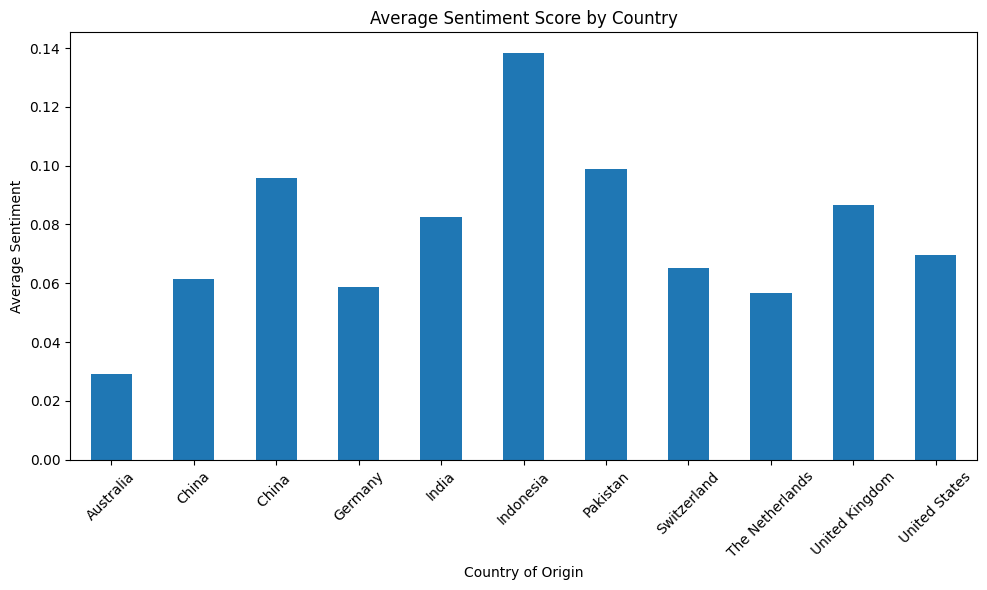

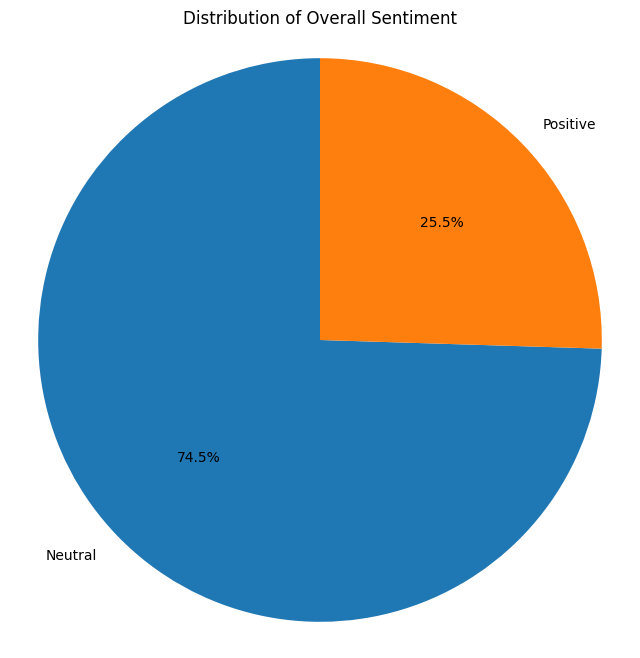

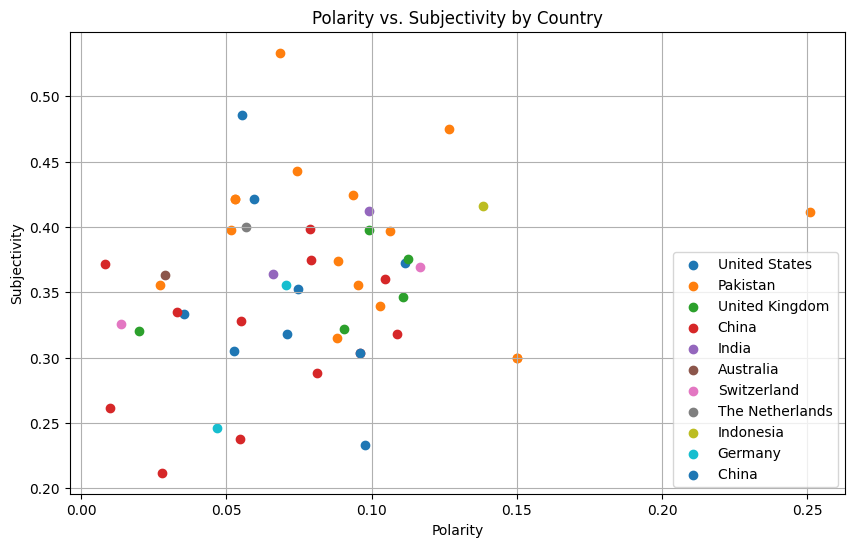

In [36]:
# prompt: can you create some plots based on this df using the country and sentiment

import matplotlib.pyplot as plt

# Create a bar plot of sentiment scores by country
plt.figure(figsize=(10, 6))
df_results.groupby('Country of Origin')['Sentiment'].mean().plot(kind='bar')
plt.title('Average Sentiment Score by Country')
plt.xlabel('Country of Origin')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Create a pie chart of overall sentiment distribution
sentiment_counts = df_results['Overall Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Overall Sentiment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Scatter plot of polarity vs. subjectivity, colored by country
plt.figure(figsize=(10, 6))
for country in df_results['Country of Origin'].unique():
    subset = df_results[df_results['Country of Origin'] == country]
    plt.scatter(subset['Polarity'], subset['Subjectivity'], label=country)
plt.title('Polarity vs. Subjectivity by Country')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# prompt: using the data frame created above with country names and sentiment scores could you plot the sentiment scores on a geographical map

import plotly.express as px

# Assuming df_results is your DataFrame with 'Country of Origin' and 'Sentiment' columns

fig = px.choropleth(df_results, locations="Country of Origin",
                    locationmode='country names', color="Sentiment",
                    hover_name="Country of Origin",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Sentiment Scores by Country")

fig.show()

In [35]:
# prompt: can you create a similar map to the one above but where each individual sentiment score for each article is plotted as a dot and every sentiment score for every article is visible and the dots are spread out across the country they apply to eg, there should be more than ten visible data points in Pakistan alone

import plotly.express as px

# Assuming df_results is your DataFrame
fig = px.scatter_geo(df_results, locations="Country of Origin", locationmode='country names',
                     color="Sentiment", hover_name="URL", size="Sentiment", # Size the dots by sentiment
                     projection="natural earth", title="Sentiment Scores by Country",
                     color_continuous_scale=px.colors.sequential.Plasma)

fig.show()